In [ ]:
import pandas as pd
import numpy as np


In [ ]:
ratings=pd.read_csv('ratings data.csv')
ratings

,Unnamed: 0,UserID,MovieID,Rating,Timestamp
0,0,1,1193,5,978300760
1,1,1,661,3,978302109
2,2,1,914,3,978301968
3,3,1,3408,4,978300275
4,4,1,2355,5,978824291
...,...,...,...,...,...
1000204,1000204,6040,1091,1,956716541
1000205,1000205,6040,1094,5,956704887
1000206,1000206,6040,562,5,956704746
1000207,1000207,6040,1096,4,956715648


In [ ]:
movies=pd.read_csv('movies data.csv') 

In [ ]:
movies = movies.drop('Unnamed: 0',axis = 1)
ratings= ratings.drop(['Unnamed: 0','Timestamp'],axis = 1)

In [ ]:
movies 

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
ratings.isna().sum()

UserID     0
MovieID    0
Rating     0
dtype: int64

In [ ]:
n_users = ratings.UserID.unique().shape[0]
n_movies = ratings.MovieID.unique().shape[0]

In [ ]:
n_users

6040

In [ ]:
n_movies

3706

In [ ]:
data = pd.merge(ratings,movies, how='outer', on='MovieID')
data.head()

,UserID,MovieID,Rating,Title,Genres
0,1.0,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama
1,2.0,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama
2,12.0,1193,4.0,One Flew Over the Cuckoo's Nest (1975),Drama
3,15.0,1193,4.0,One Flew Over the Cuckoo's Nest (1975),Drama
4,17.0,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama


In [ ]:
x = data.Genres
a = list()
for i in x:
    abc = i
    a.append(abc.split('|'))
a = pd.DataFrame(a)   
b = a[0].unique()
for i in b:
    data[i] = 0
data.head(2)

,UserID,MovieID,Rating,Title,Genres,Drama,Animation,Musical,Action,Comedy,...,Thriller,Crime,Western,Documentary,Mystery,Horror,Sci-Fi,Film-Noir,War,Fantasy
0,1.0,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in b:
    data.loc[data['Genres'].str.contains(i), i] = 1

In [ ]:
data.head(2)

,UserID,MovieID,Rating,Title,Genres,Drama,Animation,Musical,Action,Comedy,...,Thriller,Crime,Western,Documentary,Mystery,Horror,Sci-Fi,Film-Noir,War,Fantasy
0,1.0,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(1000386, 23)

In [ ]:
data = data.drop(['Genres','Title'],axis =1)
data.head()

,UserID,MovieID,Rating,Drama,Animation,Musical,Action,Comedy,Adventure,Romance,...,Thriller,Crime,Western,Documentary,Mystery,Horror,Sci-Fi,Film-Noir,War,Fantasy
0,1.0,1193,5.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193,5.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.0,1193,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1193,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,1193,5.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['UserID', 'MovieID', 'Rating', 'Drama', 'Animation', 'Musical',
       'Action', 'Comedy', 'Adventure', 'Romance', 'Children's', 'Thriller',
       'Crime', 'Western', 'Documentary', 'Mystery', 'Horror', 'Sci-Fi',
       'Film-Noir', 'War', 'Fantasy'],
      dtype='object')

In [ ]:
data.isnull().sum()

UserID         177
MovieID          0
Rating         177
Drama            0
Animation        0
Musical          0
Action           0
Comedy           0
Adventure        0
Romance          0
Children's       0
Thriller         0
Crime            0
Western          0
Documentary      0
Mystery          0
Horror           0
Sci-Fi           0
Film-Noir        0
War              0
Fantasy          0
dtype: int64

In [ ]:
data.dropna(inplace= True )

In [ ]:
data.isnull().sum()

UserID         0
MovieID        0
Rating         0
Drama          0
Animation      0
Musical        0
Action         0
Comedy         0
Adventure      0
Romance        0
Children's     0
Thriller       0
Crime          0
Western        0
Documentary    0
Mystery        0
Horror         0
Sci-Fi         0
Film-Noir      0
War            0
Fantasy        0
dtype: int64

In [ ]:
genres=data.iloc[:,-18:]

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as pl
pca = PCA(n_components=15, svd_solver='full')
pca.fit_transform(genres)
#pca_tst = pca.transform(data)
#explain = pca.explained_variance_

array([[-0.22720142, -0.77408656, -0.07707665, ..., -0.04780864,
        -0.01858707, -0.03730214],
       [-0.22720142, -0.77408656, -0.07707665, ..., -0.04780864,
        -0.01858707, -0.03730214],
       [-0.22720142, -0.77408656, -0.07707665, ..., -0.04780864,
        -0.01858707, -0.03730214],
       ...,
       [-0.22720142, -0.77408656, -0.07707665, ..., -0.04780864,
        -0.01858707, -0.03730214],
       [-0.77083188, -0.22067041, -0.21284377, ..., -0.02573472,
        -0.07323062,  0.88173503],
       [-0.02319225,  0.01361504,  0.20907441, ..., -0.16516109,
        -0.03458634, -0.09390597]])

In [ ]:
explain_ratio=pca.explained_variance_ratio_

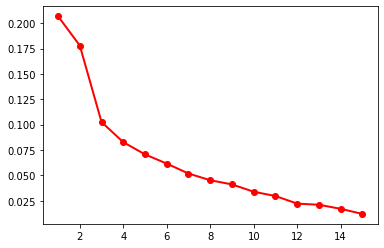

In [ ]:
import matplotlib.pyplot as plt
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)

Text(0, 0.5, 'cumulative explained variance')

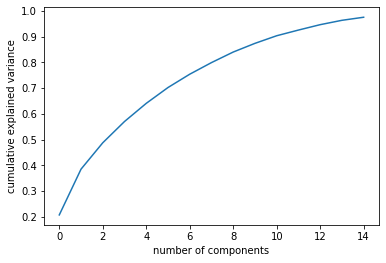

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
pcaf = PCA(n_components=10, svd_solver='full')
pcaf=pcaf.fit_transform(genres)

In [ ]:
pcaf

array([[-0.22720142, -0.77408656, -0.07707665, ..., -0.0494437 ,
        -0.0662587 , -0.0665238 ],
       [-0.22720142, -0.77408656, -0.07707665, ..., -0.0494437 ,
        -0.0662587 , -0.0665238 ],
       [-0.22720142, -0.77408656, -0.07707665, ..., -0.0494437 ,
        -0.0662587 , -0.0665238 ],
       ...,
       [-0.22720142, -0.77408656, -0.07707665, ..., -0.0494437 ,
        -0.0662587 , -0.0665238 ],
       [-0.77083188, -0.22067041, -0.21284377, ...,  0.01782424,
        -0.1668028 , -0.14721398],
       [-0.02319225,  0.01361504,  0.20907441, ..., -0.09164808,
         0.00685005,  0.21977037]])

In [ ]:
# Create the pandas DataFrame
df = pd.DataFrame(pcaf, columns = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10'])
df

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
0,-0.227201,-0.774087,-0.077077,-0.193835,-0.051515,-0.014305,0.031661,-0.049444,-0.066259,-0.066524
1,-0.227201,-0.774087,-0.077077,-0.193835,-0.051515,-0.014305,0.031661,-0.049444,-0.066259,-0.066524
2,-0.227201,-0.774087,-0.077077,-0.193835,-0.051515,-0.014305,0.031661,-0.049444,-0.066259,-0.066524
3,-0.227201,-0.774087,-0.077077,-0.193835,-0.051515,-0.014305,0.031661,-0.049444,-0.066259,-0.066524
4,-0.227201,-0.774087,-0.077077,-0.193835,-0.051515,-0.014305,0.031661,-0.049444,-0.066259,-0.066524
...,...,...,...,...,...,...,...,...,...,...
1000204,-0.023192,0.013615,0.209074,-0.277748,0.181546,0.062637,0.314711,-0.091648,0.006850,0.219770
1000205,-0.227201,-0.774087,-0.077077,-0.193835,-0.051515,-0.014305,0.031661,-0.049444,-0.066259,-0.066524
1000206,-0.227201,-0.774087,-0.077077,-0.193835,-0.051515,-0.014305,0.031661,-0.049444,-0.066259,-0.066524
1000207,-0.770832,-0.220670,-0.212844,0.045418,-0.488538,-0.090716,-0.170737,0.017824,-0.166803,-0.147214


In [ ]:
data1=data.iloc[: , :3]

In [ ]:
frames=[data1, df]
result = pd.concat(frames, axis=1)
display(result)

,UserID,MovieID,Rating,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
0,1.0,1193,5.0,-0.227201,-0.774087,-0.077077,-0.193835,-0.051515,-0.014305,0.031661,-0.049444,-0.066259,-0.066524
1,2.0,1193,5.0,-0.227201,-0.774087,-0.077077,-0.193835,-0.051515,-0.014305,0.031661,-0.049444,-0.066259,-0.066524
2,12.0,1193,4.0,-0.227201,-0.774087,-0.077077,-0.193835,-0.051515,-0.014305,0.031661,-0.049444,-0.066259,-0.066524
3,15.0,1193,4.0,-0.227201,-0.774087,-0.077077,-0.193835,-0.051515,-0.014305,0.031661,-0.049444,-0.066259,-0.066524
4,17.0,1193,5.0,-0.227201,-0.774087,-0.077077,-0.193835,-0.051515,-0.014305,0.031661,-0.049444,-0.066259,-0.066524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949.0,2198,5.0,-0.023192,0.013615,0.209074,-0.277748,0.181546,0.062637,0.314711,-0.091648,0.006850,0.219770
1000205,5675.0,2703,3.0,-0.227201,-0.774087,-0.077077,-0.193835,-0.051515,-0.014305,0.031661,-0.049444,-0.066259,-0.066524
1000206,5780.0,2845,1.0,-0.227201,-0.774087,-0.077077,-0.193835,-0.051515,-0.014305,0.031661,-0.049444,-0.066259,-0.066524
1000207,5851.0,3607,5.0,-0.770832,-0.220670,-0.212844,0.045418,-0.488538,-0.090716,-0.170737,0.017824,-0.166803,-0.147214


In [ ]:
#pip install umap-learn

In [ ]:
#import umap
#reducer = umap.UMAP(n_components=3)
#reducer.fit_transform(pca_tst)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
 
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist( df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeanModel.inertia_

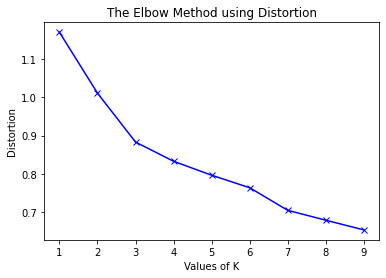

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
wcss = []
for i in range(1,10):
	kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
	kmeans_pca.fit(df)
	wcss.append(kmeans_pca.inertia_)

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,10), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
clustered=kmeans.fit_transform(df)

In [ ]:
clustered

In [ ]:
df['Cluster'] = kmeans.labels_
display(df)

In [ ]:
df['Cluster'].value_counts()

In [ ]:
'''e = []
def fi(group):
    a = pd.DataFrame(group)
    b = pd.DataFrame(a['Cluster'].value_counts())
    d = a.index 
    c = [a['MovieID'][d[0]],int(b.idxmax())]
    e.append(c)'''

In [ ]:
result.groupby("MovieID").apply(lambda x: fi(x))

In [ ]:
e = pd.DataFrame(e)

In [ ]:
e.rename(columns = {0:'MovieID',1:'Cluster'},inplace=True)
e.drop_duplicates(inplace=True)

In [ ]:
display(e)

In [ ]:
ratings1= ratings
display(ratings1)

In [ ]:
table = pd.pivot_table(ratings, values='Rating', index='UserID', columns=['MovieID'])
table

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
'''header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=header)'''

In [ ]:
'''n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]'''

In [ ]:
from sklearn.model_selection import train_test_split 
train_data, test_data = train_test_split(df, test_size = 0.25, random_state = 0)

In [ ]:
data_matrix = np.zeros((n_users, n_movies))
for line in train_data.itertuples():
    data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((n_users, n_movies))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [ ]:
#data_matrix

In [ ]:
'''
u = []
def fi(group):
    a = pd.DataFrame(group)
    b = pd.DataFrame(a['Cluster'].value_counts())
    d = a.index 
    c = [a['UserID'][d[0]],int(b.idxmax())]
    u.append(c)
'''

In [ ]:
'''
result.groupby("UserID").apply(lambda x: fi(x))

In [ ]:
'''
u = pd.DataFrame(u)

In [ ]:
'''
u.rename(columns = {0:'UserID',1:'Cluster'},inplace=True)
u.drop_duplicates(inplace=True)

In [ ]:
''''
display(u)
print(u['Cluster'].value_counts())

In [ ]:
'''
movie_profile = movies[['id', 'title', 'genres']]
movie_profile.rename(columns={'id': 'movieId'}, inplace=True)
genres = [item.strip() for l in all_genres for item in l ]
unique_genres = set(genres)
for genre in unique_genres:
  movie_profile[genre] = 0
  
for i in range(len(movie_profile)):
  if type(movie_profile['genres'].iloc[i]) != None._class_:
    Genres = movie_profile.iloc[i].genres.split(', ')
    for g in Genres:
      movie_profile[g].iloc[i] = 1
movie_profile = movie_profile.drop(columns=['title', 'genres']).set_index('movieId')
movie_profile.sort_index(axis=0, inplace=True)


user_x_movie =pd.pivot_table(data, values='Rating', index=['MovieID'], columns = ['UserID'])
user_x_movie.sort_index(axis=0, inplace=True)
userIDS = user_x_movie.columns
user_profile = pd.DataFrame(columns = movie_profile.columns)
'''

In [ ]:
#from sklearn.model_selection import train_test_split
#train_data, test_data = train_test_split(clustered, test_size = 0.25, random_state = 0)

In [ ]:
#pip install scikit-surprise

In [ ]:
#train_data_matrix = np.zeros((n_users, n_movies))
#for line in train_data.itertuples():
#    train_data_matrix[line[1]-1, line[2]-1] = line[3]
'''   
test_data_matrix = np.zeros((n_users,n_movies))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]
'''

In [ ]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds as svd

#get SVD components from train matrix. Choose k.
u, s, vt = svd(table, k = 20)
svd.fit_transform(genres)


In [ ]:
s_diag_matrix=np.diag(s)
X = np.dot(np.dot(u, s_diag_matrix), vt)
print(X)

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
table=table.apply(lambda row: row.fillna(row.mean()), axis=1)
table

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.000000,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,...,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679
2,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,...,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178
3,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,...,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961
4,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,...,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476
5,3.146465,3.146465,3.146465,3.146465,3.146465,2.000000,3.146465,3.146465,3.146465,3.146465,...,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.302928,3.302928,3.302928,2.000000,3.302928,3.000000,3.302928,3.302928,3.302928,3.302928,...,3.302928,3.302928,3.302928,3.302928,3.302928,3.302928,3.302928,3.302928,3.302928,3.302928
6037,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,...,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822
6038,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,...,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000


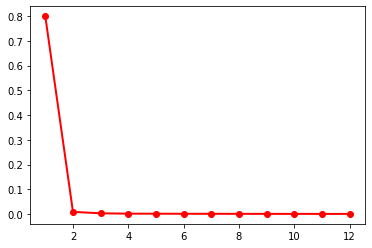

In [ ]:
svd = TruncatedSVD(n_components=12, random_state=42)
svd.fit(table)
SVD_values = np.arange(svd.n_components) + 1
plt.plot(SVD_values, svd.explained_variance_ratio_, 'ro-', linewidth=2)

In [ ]:
svd = TruncatedSVD(n_components=2, random_state=42)
X_transformed=svd.fit_transform(table)

In [ ]:
X_transformed

array([[254.98645979,  -1.84869212],
       [226.05688221,  -0.30853551],
       [237.53521354,  -1.50427153],
       ...,
       [231.32352447,  -1.96434068],
       [236.08218349,  -1.32962116],
       [217.8272241 ,   1.90958961]])

In [ ]:
U = X_transformed / svd.singular_values_
Sigma_matrix = np.diag(svd.singular_values_)
VT = svd.components_
X_pred = np.dot(np.dot(U, Sigma_matrix), VT)

In [ ]:
X_pred

array([[4.2401651 , 4.18364057, 4.1842215 , ..., 4.18729675, 4.19114856,
        4.1849719 ],
       [3.84850047, 3.68293755, 3.68583439, ..., 3.71334291, 3.71557115,
        3.72009322],
       [3.96461146, 3.89304672, 3.89397798, ..., 3.90090161, 3.90429546,
        3.90017901],
       ...,
       [3.82737395, 3.80101851, 3.80103134, ..., 3.79847125, 3.80222175,
        3.79445995],
       [3.95147775, 3.86599338, 3.86721514, ..., 3.87717831, 3.88040384,
        3.8775559 ],
       [3.85669976, 3.50565306, 3.5123954 , ..., 3.58001122, 3.58019008,
        3.60113215]])

In [ ]:
#U = X_transformed / svd.singular_values_
#Sigma_matrix = np.diag(svd.singular_values_)
#VT = svd.components_

#X_pred = np.dot(np.dot(U, Sigma_matrix), VT)

In [ ]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error
from math import sqrt

#get SVD components from train matrix. Choose k.
u, s, vt = svds(table, k = 2)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print(X_pred)

[[4.24016506 4.18364056 4.18422151 ... 4.18729675 4.19114856 4.1849719 ]
 [3.84850047 3.68293755 3.68583439 ... 3.71334291 3.71557115 3.72009322]
 [3.9646114  3.89304671 3.893978   ... 3.90090161 3.90429546 3.90017901]
 ...
 [3.82737389 3.8010185  3.80103136 ... 3.79847125 3.80222175 3.79445994]
 [3.95147772 3.86599337 3.86721515 ... 3.87717831 3.88040384 3.8775559 ]
 [3.85669988 3.50565305 3.51239537 ... 3.58001122 3.58019008 3.60113216]]
